In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import numpy as np

In [2]:
df = pd.read_table("../input/table_data.txt")
pprint(df.columns)
# print('types', df.dtypes)
# df.head(10)


Index(['index', 'alpha', 'cz_inter', 'cx_inter', 'cz', 'cx', 'cx' ', 'c'x_p',
       'a_i [deg]', 'a_p [deg]', 'cz_h', 'cx_h', 'cx_szkodliwe', 'C_x samolot',
       'C_z samolotu', 'K', 'E'],
      dtype='object')


In [3]:
# interpolacja cz i cx

cz = np.polyfit(df['alpha'],df['cz'] ,20)
cx = np.polyfit(df['alpha'],df['cx'] ,20)

p_cz = np.poly1d(cz)
p_cx = np.poly1d(cx)


df['cz_inter'] = p_cz(df['alpha'])
df['cx_inter'] = p_cx(df['alpha'])

# plt.plot(df['alpha'], df['cz_inter'])
# plt.plot(df['alpha'], df['cz'])

# plt.plot(df['alpha'], df['cz_inter'])
# plt.plot(df['alpha'], df['cz'])

    

# df.loc[:, ['cz_inter',  'cx_inter']].to_clipboard()

### plots cx plata i samolot

Text(0, 0.5, '$C_z$')

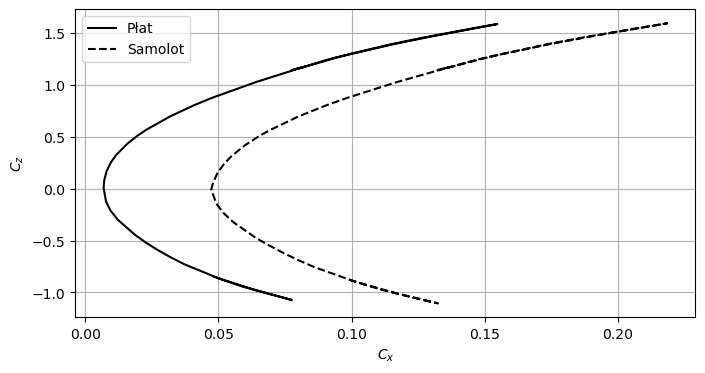

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(df["c'x_p"], df['cz_inter'], label = "Płat", c = 'black', linestyle = "solid")
ax.plot(df['C_x samolot'], df['C_z samolotu'], label = "Samolot", c = 'black', linestyle = "dashed")
ax.legend()
ax.grid(True)
ax.set_xlabel("$C_x$")
ax.set_ylabel("$C_z$")

# plt.savefig("cxcz.png", dpi = 200, bbox_layout = "tight")

C:\Users\marek\AppData\Local\Temp\ipykernel_13012\1651579586.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("energies_cz.png", dpi = 200, bbox_layout = "tight")


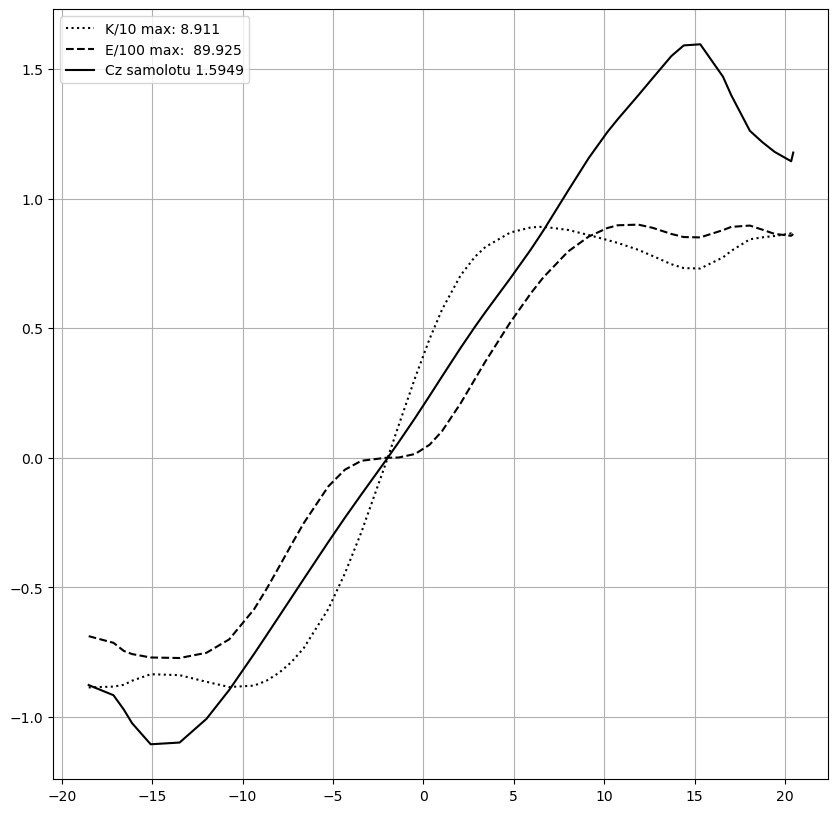

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))

plt.plot(df["alpha"], df['K']/10, label = f"K/10 max: {round(df['K'].max(), 3)}", linestyle = 'dotted', c = 'black')
plt.plot(df["alpha"], df['E']/100, label = f"E/100 max:  {round(df['E'].max(), 4)}" , linestyle= 'dashed', c = 'black')
plt.plot(df["alpha"], df['C_z samolotu'], label = f"Cz samolotu {round(df['C_z samolotu'].max(), 4)}", linestyle  = 'solid', c = 'black')
# plt.plot(df["alpha"], df['cz_inter'], label = "chuj")
plt.legend()
plt.grid(True)

plt.savefig("energies_cz.png", dpi = 200, bbox_layout = "tight")


### aproksymacja cahrakterystyk aerodynaczmincyh


In [6]:
print(df.columns)

Index(['index', 'alpha', 'cz_inter', 'cx_inter', 'cz', 'cx', 'cx' ', 'c'x_p',
       'a_i [deg]', 'a_p [deg]', 'cz_h', 'cx_h', 'cx_szkodliwe', 'C_x samolot',
       'C_z samolotu', 'K', 'E'],
      dtype='object')


[15.2238916 -0.73466  ]


C:\Users\marek\AppData\Local\Temp\ipykernel_13012\2734029826.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../img/cx_cz_sq.png", dpi = 200, bbox_layout = 'tight')


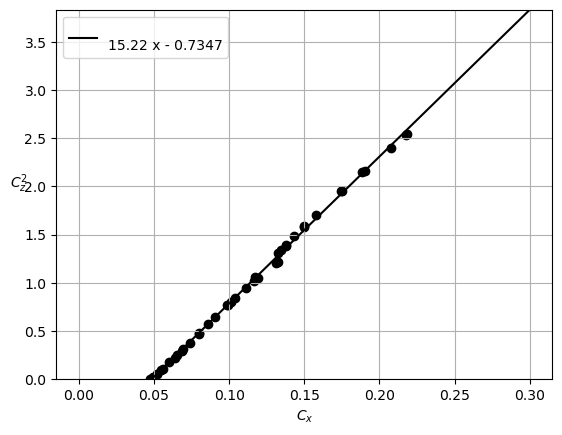

In [7]:
# tworzenie dodatkowej kolumny od cz^2
df['cz_sam_sq'] = df['C_z samolotu']*df['C_z samolotu']

#calculate equation for trendline
x = np.arange(0, max(df['C_x samolot']) + 0.1, 0.1)
z = np.polyfit(df['C_x samolot'], df['cz_sam_sq'], 1)
p = np.poly1d(z)


#add trendline to plot
plt.plot(x, p(x), c = 'black', label = f"{p}")
plt.scatter(df['C_x samolot'], df['cz_sam_sq'], c = 'black')
plt.xlabel("$C_x$")
plt.ylabel("$C_z^2$", rotation = 0)

plt.ylim(0, max(p(x)))
plt.grid()
plt.legend()
plt.savefig("../img/cx_cz_sq.png", dpi = 200, bbox_layout = 'tight')


         2
0.06661 x - 0.001342 x + 0.04781


C:\Users\marek\AppData\Local\Temp\ipykernel_13012\3441672794.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../img/cx_cz_sq.png", dpi = 200, bbox_layout = 'tight')


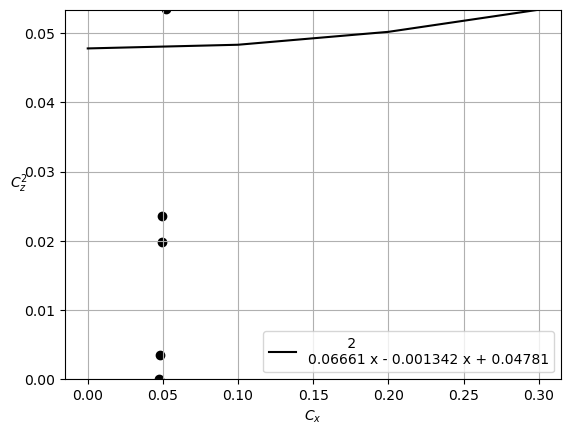

In [8]:
# tworzenie dodatkowej kolumny od cz^2
df['cz_sam_sq'] = df['C_z samolotu']*df['C_z samolotu']

#calculate equation for trendline
x = np.arange(0, max(df['C_x samolot']) + 0.1, 0.1)
z = np.polyfit(df['C_z samolotu'], df['C_x samolot'],  2)
p = np.poly1d(z)

print(p)


#add trendline to plot
plt.plot(x, p(x), c = 'black', label = f"{p}")
plt.scatter(df['C_x samolot'], df['cz_sam_sq'], c = 'black')
plt.xlabel("$C_x$")
plt.ylabel("$C_z^2$", rotation = 0)

plt.ylim(0, max(p(x)))
plt.grid()
plt.legend()
plt.savefig("../img/cx_cz_sq.png", dpi = 200, bbox_layout = 'tight')
